In [1]:
# MADE BY BATUHAN CAKIR
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Importing dataset
mnist_dataset = keras.datasets.mnist

In [3]:
# Dividing dataset train and test
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Train and Test Sets shapes
print("Train set shape = ", x_train.shape)
print("Test set shape = ", x_test.shape)

Train set shape =  (60000, 28, 28)
Test set shape =  (10000, 28, 28)


In [5]:
# Computing the histogram counts for each train class
hist_counts, hist_bins = np.histogram(y_train, bins=np.arange(len(np.unique(y_train)) + 1))

# Calculating train class probabilities
total_count = sum(hist_counts)
probabilities = hist_counts / total_count
rounded_probabilities = [round(p, 4) for p in probabilities]

# Creating bar plot for each train class
colors = px.colors.qualitative.Plotly[:len(hist_counts)]
fig = go.Figure(data=[go.Bar(x=hist_bins[:-1], y=hist_counts, marker_color = colors, text = rounded_probabilities, textposition = "outside")])
fig.update_layout(title = "Class Distribution for Train Set", xaxis_title = "Class", yaxis_title = "Count", xaxis = dict(tickmode = "linear", tick0 = 0, dtick = 1))
fig.show()

In [6]:
# Creating a pie chart for each train class
fig = go.Figure(data = [go.Pie(labels=hist_bins[:-1], values = rounded_probabilities, textposition = "inside", textinfo = "label+percent", marker = dict(colors = colors))])
fig.update_layout(title = "Class Distribution for Train Set")
fig.show()

In [7]:
# Computing the histogram counts for each test class
hist_counts, hist_bins = np.histogram(y_test, bins = np.arange(len(np.unique(y_test)) + 1))

# Calculating test class probabilities
total_count = sum(hist_counts)
probabilities = hist_counts / total_count
rounded_probabilities = [round(p, 4) for p in probabilities]

# Creating bar plot for each train class
colors = px.colors.qualitative.Plotly[:len(hist_counts)]
fig = go.Figure(data = [go.Bar(x=hist_bins[:-1], y = hist_counts, marker_color = colors, text = rounded_probabilities, textposition = "outside")])
fig.update_layout(title = "Class Distribution for Test Set", xaxis_title = "Class", yaxis_title = "Count", xaxis = dict(tickmode = "linear", tick0 = 0, dtick = 1))
fig.show()

In [8]:
# Creating a pie chart for each test class
fig = go.Figure(data = [go.Pie(labels = hist_bins[:-1], values = rounded_probabilities, textposition = "inside", textinfo = "label+percent", marker = dict(colors = colors))])
fig.update_layout(title = "Class Distribution for Test Set")
fig.show()

In [9]:
# Normalizing training and testing data between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

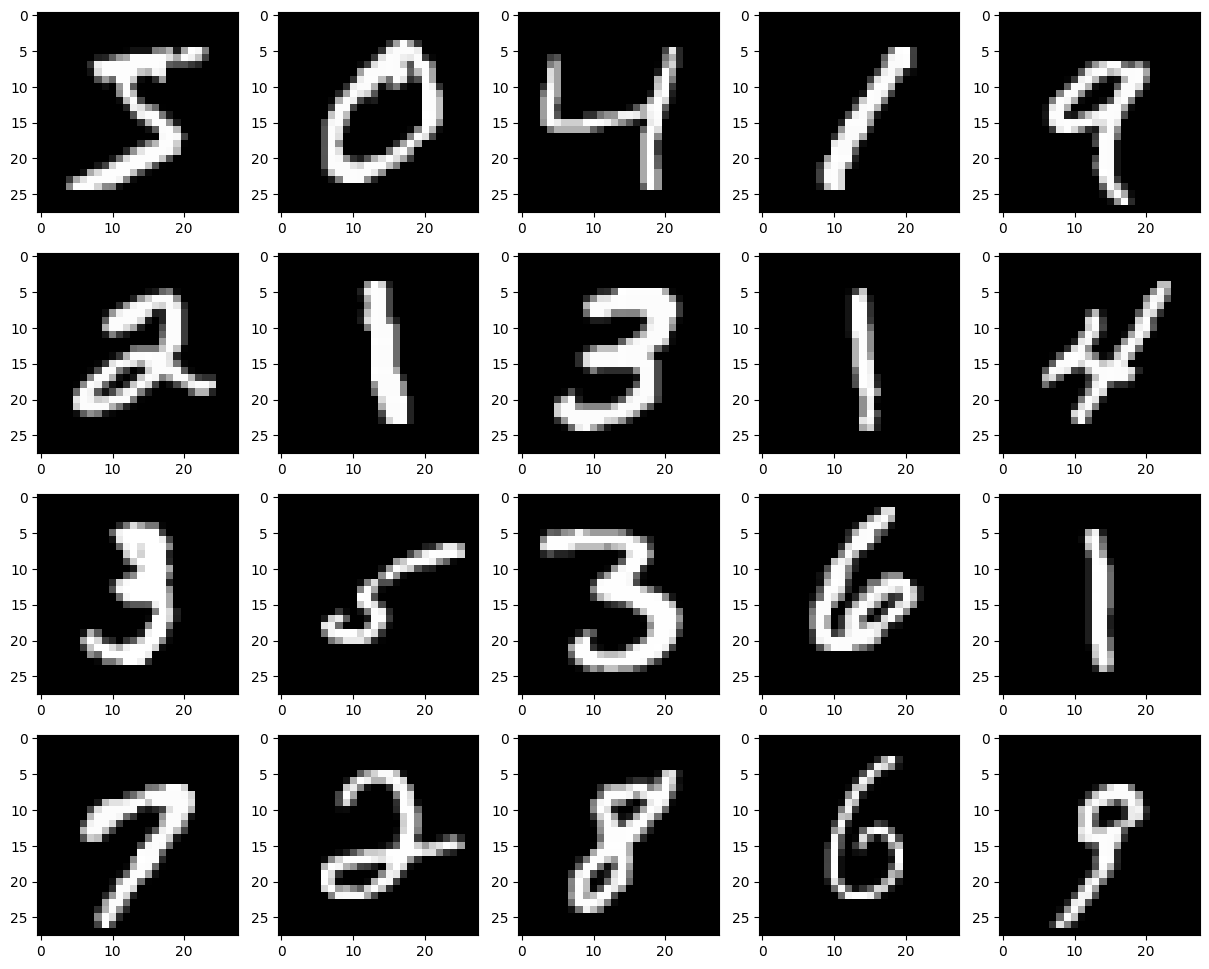

In [10]:
# Handwriting image samples
plt.figure(figsize = (15, 12))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i], cmap = "gray")
plt.show()

In [11]:
# Creating ConvNet Model architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.keras.layers.LeakyReLU(alpha = 0.01), input_shape = (28, 28, 1)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation=tf.keras.layers.LeakyReLU(alpha = 0.01)),
    keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = tf.keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(10, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [12]:
# Defining loss type and optimizer type for our model
model_loss = keras.losses.SparseCategoricalCrossentropy()
model_optimizer = keras.optimizers.Adam()
model_metrics = ["accuracy"]
model.compile(loss = model_loss, optimizer = model_optimizer, metrics = model_metrics)

In [13]:
# Training Hyperparameter choosing
batch_size = 256
epochs = 50
early_stop = keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 10,
        verbose = 1,
        mode = "max",
        restore_best_weights = True,
     )

reduce_p = keras.callbacks.ReduceLROnPlateau(
        monitor = "val_accuracy",
        factor = 0.2,
        patience = 3,
        verbose = 1,
        mode = "max",
        min_lr = 0.00001,
     )

In [14]:
# Train the model and store in the history
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, callbacks = [early_stop, reduce_p], validation_data = (x_test, y_test))

# Extracting the accuracy values from the training history
train_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
# Extracting the loss values from the training history
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

Epoch 1/50
235/235 [==============================] - 527s 2s/step - loss: 0.0844 - accuracy: 0.9736 - val_loss: 4.3537 - val_accuracy: 0.1149 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 522s 2s/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.3206 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - 526s 2s/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0293 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - 525s 2s/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0492 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 5/50
235/235 [==============================] - 526s 2s/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0551 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 6/50
235/235 [==============================] - 525s 2s/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0281 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 7/50
235/235 [==============================] - 527s 2s/st

In [15]:
# Creating the accuracy per epoch figure
fig = go.Figure()
# Training and testing accuracy lines per epoch
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = train_accuracy, mode = "lines", name = "Training Accuracy"))
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = test_accuracy, mode = "lines", name = "Test Accuracy"))
# Updating layout
fig.update_layout(title = "Training and Test Accuracy", xaxis_title = "Epoch", yaxis_title = "Accuracy")
fig.show()

In [16]:
# Creating the loss per epoch figure
fig = go.Figure()
# Training and testing loss lines per epoch
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = train_loss, mode = "lines", name = "Training Loss"))
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = test_loss, mode = "lines", name = "Test Loss"))
# Update layout
fig.update_layout(title = "Training and Test Loss", xaxis_title = "Epoch", yaxis_title = "Loss")
fig.show()

313/313 [==============================] - 23s 75ms/step


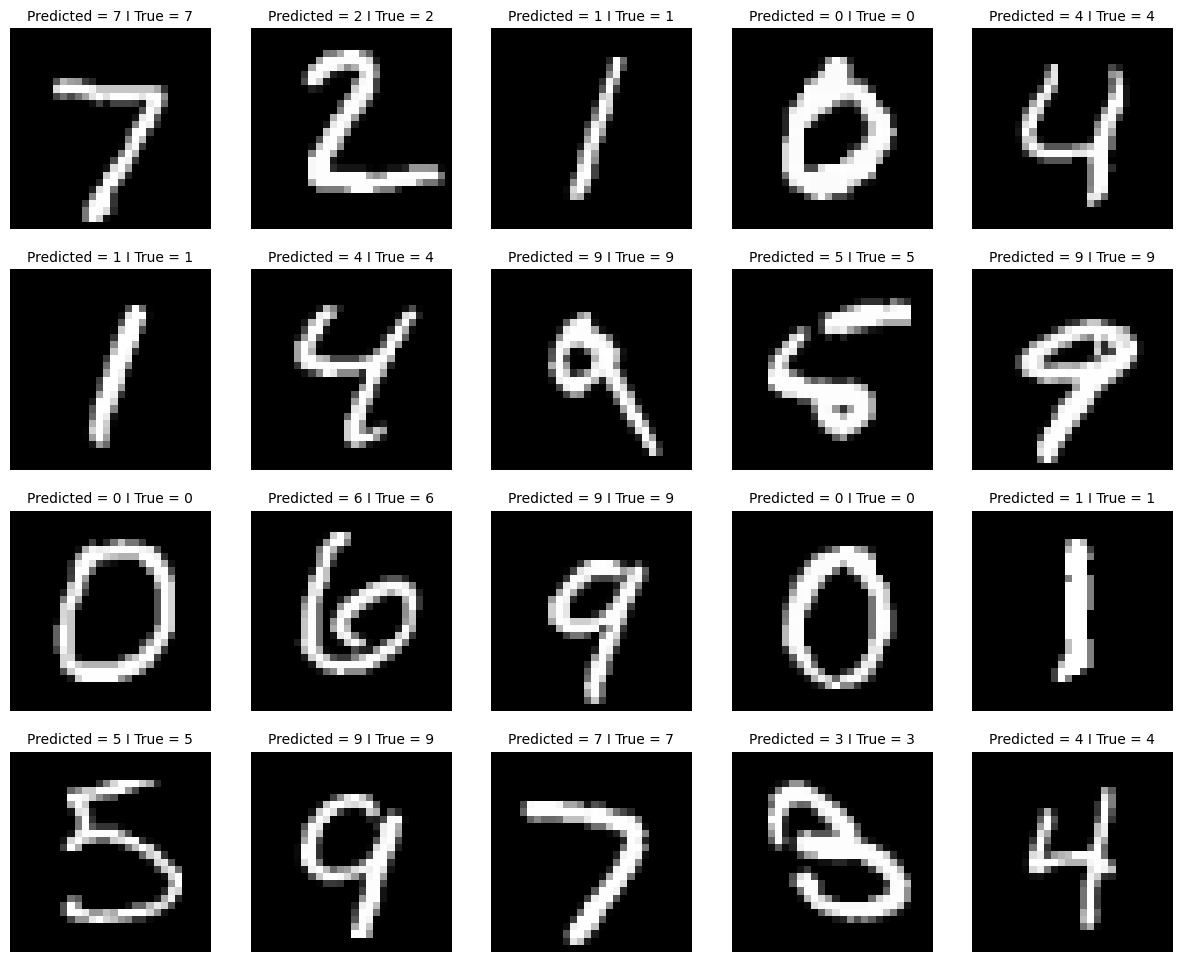

In [19]:
# 20 testing data sample and their predicted values
y_pred = model.predict(x_test)

plt.figure(figsize = (15, 12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i], cmap = "gray")
    plt.axis("off")
    plt.title("Predicted = {0} I True = {1}".format(y_pred[i].argmax(), y_test[i]), fontsize = 10)
plt.show()

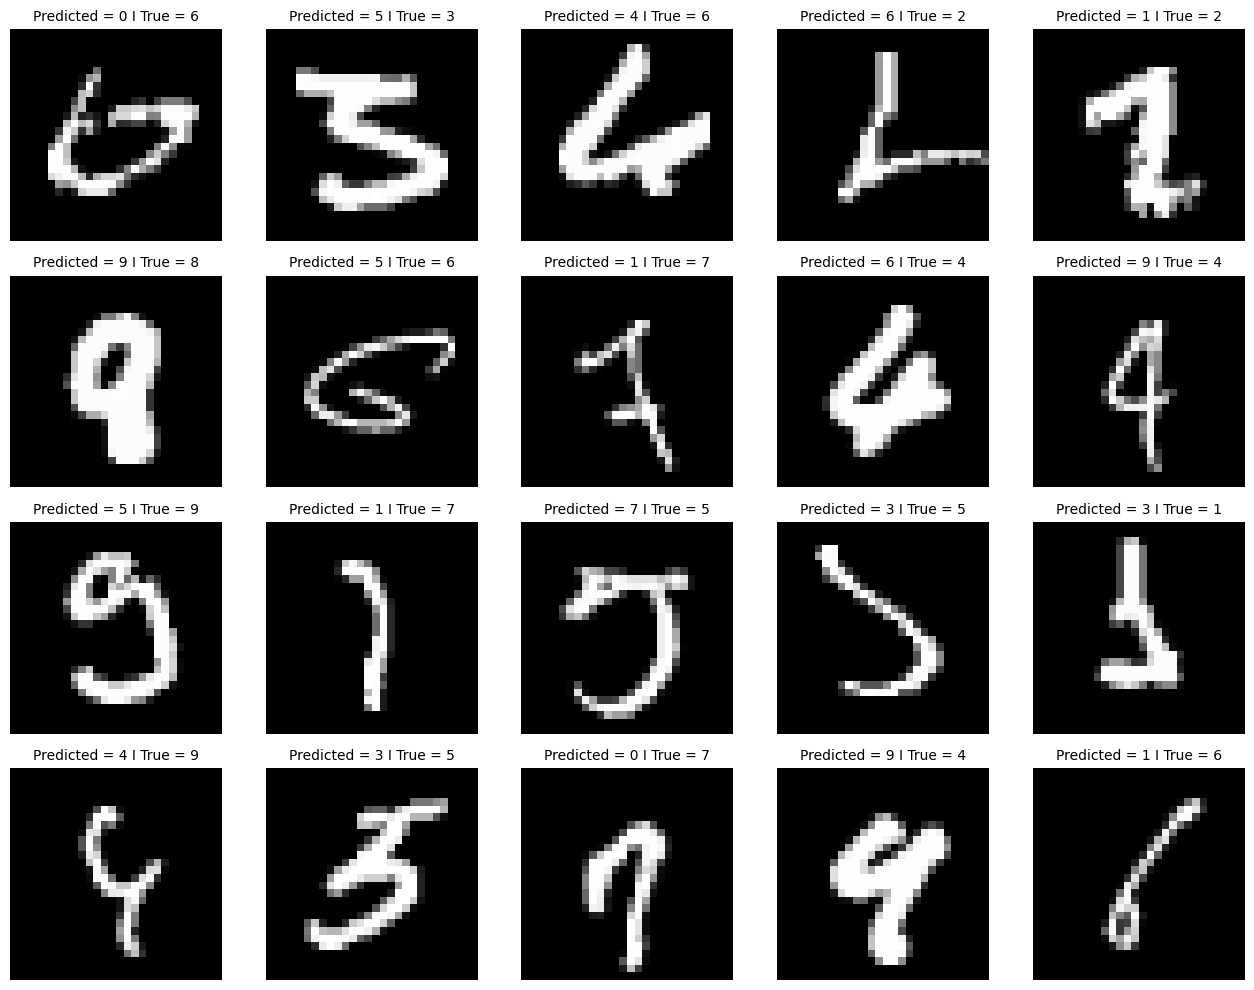

In [18]:
# 20 testing data sample and their non-correct predicted values
sum = 0
fig = plt.figure(figsize = (13, 10))

for i in range(10000):
    if sum == 20:
        break
    if y_pred[i].argmax() != y_test[i]:
        ax = fig.add_subplot(4, 5, sum+1)
        ax.imshow(x_test[i], cmap="gray")
        ax.axis('off')
        ax.set_title("Predicted = {0} I True = {1}".format(y_pred[i].argmax(), y_test[i]), fontsize=10)
        sum += 1

plt.tight_layout()
plt.show()